In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
import sympy as sym

# Método de Euler hacia adelante

<function eulerforw at 0x000002C53D4EB1A0>


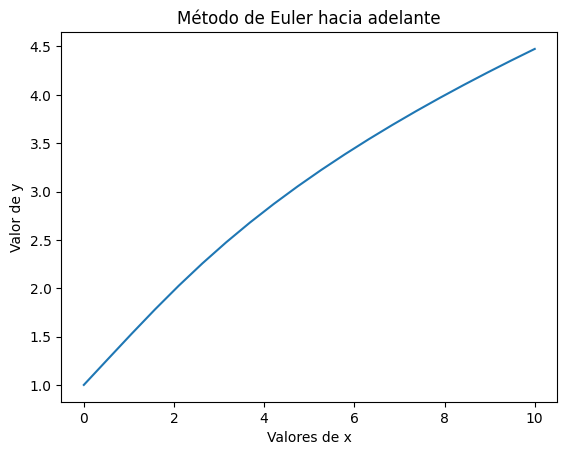

In [24]:
# Implementado con el ejercicio 1
def eulerforw(x0, xf, y0, n, func):
    
    deltax = (xf-x0) / (n - 1) # cálculo de la delta
    x1 = np.linspace(x0, xf, n)
    y1 = np.zeros(n)
    
    y1[0] = y0 #almacenar
    for i in range(1, n):
        y1[i] = deltax * func(x1[i-1], y1[i-1]) + y1[i-1] # fórmula
    return x1, y1
    
x0 = 0
xf = 10 # hasta donde llega eje x
y0 = 1 # punto inicial 
n = 20 # pasos
func = lambda x, y: np.exp(x)/(y*(1+np.exp(x)))
x1, y1 = eulerforw(x0, xf, y0, n, func)
print(eulerforw)
plt.plot(x1, y1)
plt.xlabel('Valores de x')
plt.ylabel('Valor de y')
plt.title('Método de Euler hacia adelante')
plt.show()

# Método de Euler hacia atrás

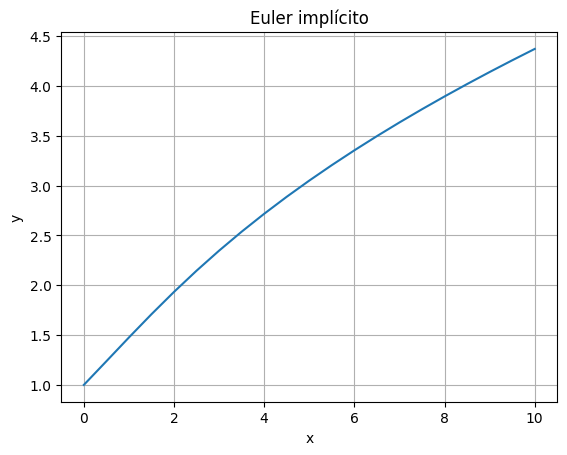

In [16]:
# Implementado con el ejercicio 1
def eulerbckw(f, a, b, y0, n): # a, b: límites del intervalo, f: función, y0: valor inicial de la función, n: número de pasos
    x2 = np.linspace(a, b, n+1) 
    y2 = np.zeros(n+1)
    y2[0]=y0
    h = (b - a)/n
    for i in range(1, n+1):
        xi = x2[i]
        yf = y2[i-1] + h * f(xi, y2[i-1])  # Utilizamos el método de Euler explícito para la estimación inicial
        y2[i] = y2[i-1] + h * f(xi, yf)   # Corregir usando la nueva estimación
    return(x2, y2) # x: array con los valores de la variable independiente.
# y: array de valores de la función en los puntos correspondientes.

def f(x, y):
    return np.exp(x)/(y*(1 + np.exp(x)))

# Condiciones iniciales
a = 0
b = 10
y0 = 1 #La función comienza desde este valor y progresa hacia adelante para calcular los valores de la función 
       # en los puntos subsiguientes dentro del intervalo
n = 20 # Pasos, este código necesita más número de pasos para quedar como quedan el runge kutta y analítico

(x2, y2)=eulerbckw(f, a, b, y0, n)

# Graficar la solución
plt.plot(x2, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler implícito')
plt.grid(True)
plt.show()

# Método Runge-Kutta

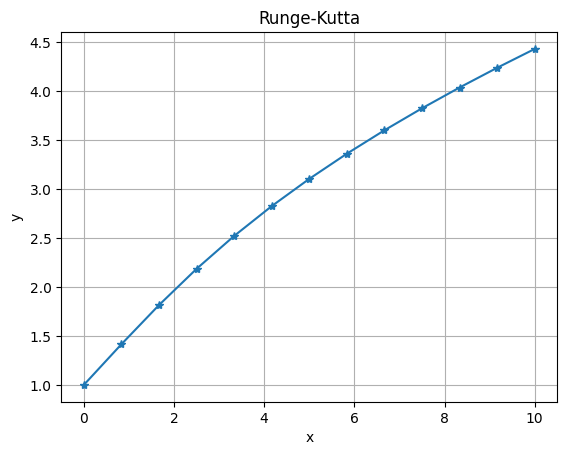

In [7]:
# Implementado con el ejercicicio 1
def runge_kutta(x0, y0, xn, n, f): # x0, y0: intrvalo, xn: valor inicial, n: número de pasos, f: función
    h = (xn-x0)/float(n)
    x3 = np.linspace(x0, xn, n+1)
    y3 = np.zeros(n+1)
    y3[0] = y0
    for i in range(n):
        k1 = h * f(x3[i], y3[i])
        k2 = h * f(x3[i] + 0.5*h, y3[i] + 0.5*k1)
        k3 = h * f(x3[i] + 0.5*h, y3[i] + 0.5*k2)
        k4 = h * f(x3[i] + h, y3[i] + k3)
        y3[i+1] = y3[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return x3, y3

# Parámetros
f = lambda x, y: np.exp(x)/(y*(1 + np.exp(x)))
x0 = 0
y0 = 1
xn = 10
n = 12
x3, y3 = runge_kutta(x0, y0, xn, n, f)

# Gráfica
plt.plot(x3, y3, '*-')
plt.title('Runge-Kutta')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

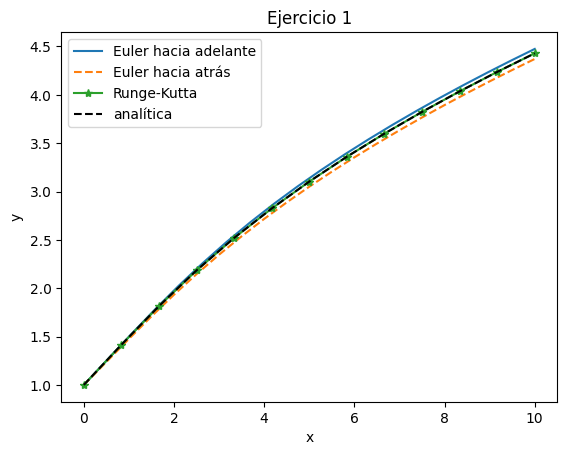

In [25]:
# plots
plt.plot(x1, y1, label = 'Euler hacia adelante')
plt.plot(x2, y2, '--', label = 'Euler hacia atrás')
plt.plot(x3, y3, '*-', label = 'Runge-Kutta')
plt.plot(t, fv(t), 'k--', label = 'analítica')
plt.title('Ejercicio 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Solución analítica

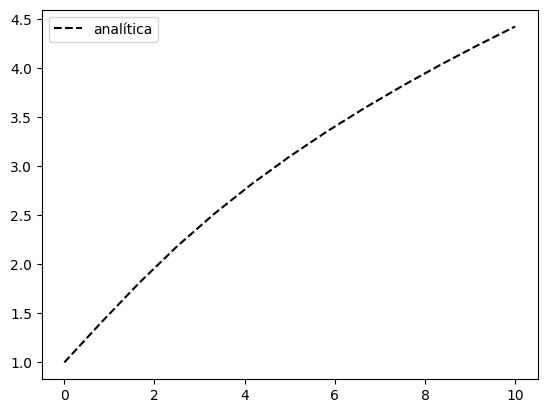

In [11]:
# Solución analítica
c = -0.386
fv = lambda x: np.sqrt(2*np.log(1 + np.exp(x)) + c)  # analítica
a = 0
b = 10
n = 12
t = np.linspace(a, b, n + 1)
plt.plot(t, fv(t), 'k--', label = 'analítica')
plt.legend()

# Los métodos de Euler implícito y explícito necesitan más pasos para llegar a ser similares a la solución analítica y a la de Runge Kutta.

# Ejercicio 2

<function eulerforw at 0x000002C53D4EB1A0>


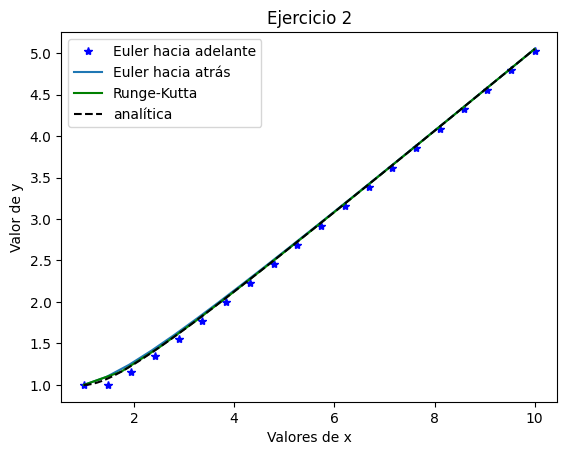

In [27]:
# Solución analítica
c = -0.5
fv1 = lambda x: x /2 - c/x  # analítica
a = 1
b = 10
n = 100
t1 = np.linspace(a, b, n + 1)

#Euler hacia adelante
dx = lambda x, y: (x - y)/x
x1_2, y1_2 = eulerforw(1, 10, 1, 20, dx)
print(eulerforw)

#Runge-Kutta
func = lambda x, y: (x - y)/x
x3_2, y3_2 = runge_kutta(1, 1, 10, 12, func)

#Euler hacia atrás
fu = lambda x, y: (x - y)/x
(x2_2, y2_2)=eulerbckw(fu, 1, 10, 1, 20)

# Gráfica
plt.plot(x1_2, y1_2, '*b',label = 'Euler hacia adelante')
plt.plot(x2_2, y2_2, label='Euler hacia atrás')
plt.plot(x3_2, y3_2, 'g',label = 'Runge-Kutta')
plt.plot(t1, fv1(t1), 'k--', label = 'analítica')
plt.legend()
plt.xlabel('Valores de x')
plt.ylabel('Valor de y')
plt.title('Ejercicio 2')
plt.show()

# Ejercicio 3

<function eulerforw at 0x000002C53D4EB1A0>


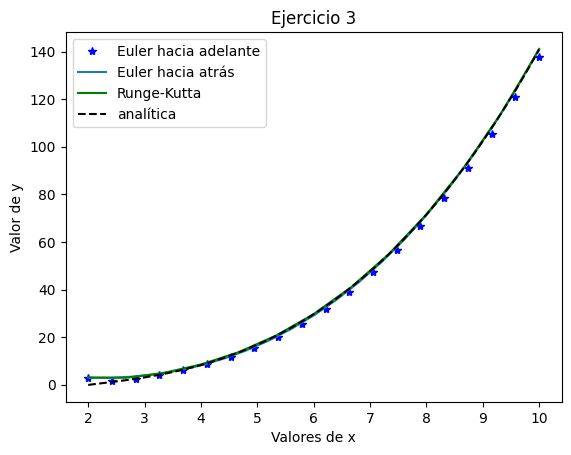

In [28]:
# Solución analítica
# Solución analítica
c = -13
fv2 = lambda x: x**3/7 - x/5 + c/x**4  # analítica
a = 2
b = 10
n = 100
t2 = np.linspace(a, b, n + 1)

#Euler hacia adelante
dx_3 = lambda x, y: (x**3 - x - 4*y)/x
x1_3, y1_3 = eulerforw(2, 10, 3, 20, dx_3)
print(eulerforw)

#Runge-Kutta
func_3 = lambda x, y: (x**3 - x - 4*y)/x
x3_3, y3_3 = runge_kutta(2, 3, 10, 12, func_3)

#Euler hacia atrás
fu_3 = lambda x, y: (x**3 - x - 4*y)/x
(x2_3, y2_3)=eulerbckw(fu_3, 2, 10, 3, 20)

# Gráfica
plt.plot(x1_3, y1_3, '*b',label = 'Euler hacia adelante')
plt.plot(x2_3, y2_3, label='Euler hacia atrás')
plt.plot(x3_3, y3_3, 'g',label = 'Runge-Kutta')
plt.plot(t2, fv2(t2), 'k--', label = 'analítica')
plt.legend()
plt.xlabel('Valores de x')
plt.ylabel('Valor de y')
plt.title('Ejercicio 3')
plt.show()